# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')
# Display the data table for preview
combined_data_df.head(100)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
# Checking the number of mice.
len(combined_data_df. index)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicate_data = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]

show_duplicate_data['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data_df.loc[combined_data_df['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean_mouse_data = combined_data_df.loc[combined_data_df["Mouse ID"]!= 'g989']
Clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Clean_mouse_data["Mouse ID"].nunique()

248

In [7]:
# Checking the number of mice in the clean DataFrame.
Clean_mouse_data.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [8]:
Clean_mouse_data[Clean_mouse_data["Mouse ID"]== "g989" ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_df = Clean_mouse_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Tumor_Vol_Avg = drug_regimen_df["Tumor Volume (mm3)"].mean()
Tumor_Vol_Med= drug_regimen_df["Tumor Volume (mm3)"].median()
Tumor_Vol_Var = drug_regimen_df["Tumor Volume (mm3)"].var()
Tumor_Vol_Std = drug_regimen_df["Tumor Volume (mm3)"].std()
Tumor_Vol_Sem = drug_regimen_df["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
sat_summary_tv=pd.DataFrame({"Mean Tumor Volume": Tumor_Vol_Avg,
                             "Median Tumor Volume" : Tumor_Vol_Med,
                             "Variance Tumor Volume" :Tumor_Vol_Var,
                              "Std Tumor Volume": Tumor_Vol_Std,
                              "SEM Tumor Volume": Tumor_Vol_Sem})
sat_summary_tv


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_tv = Clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_summary_tv 


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'No. of Mice')

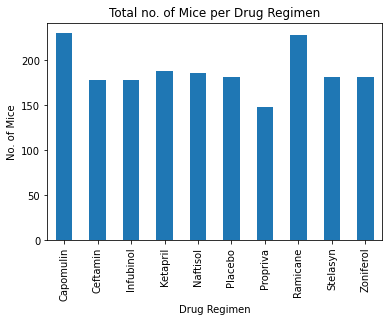

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Plot_drugregimen_bar = Clean_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count()
Plot_drugregimen_bar.plot(kind = 'bar')
#set the title, xlabel, ylabel
plt.title("Total no. of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

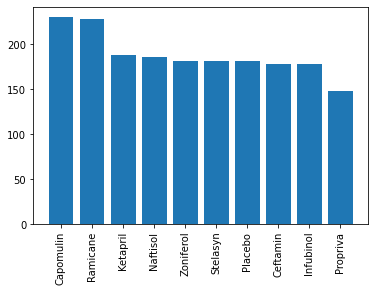

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_plot = Clean_mouse_data["Drug Regimen"].value_counts()
index = bar_plot.index.values
value = bar_plot.values
plt.bar(index, value)
plt.xticks(rotation= 90)

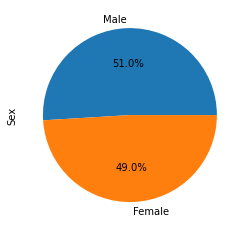

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_dist_pie = Clean_mouse_data["Sex"].value_counts()
sex_dist_pie.plot(kind='pie', autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x24d8f818a88>,
 [Text(-0.03308201408261547, 1.0995024239828841, ''),
  Text(0.033082014082615095, -1.0995024239828841, '')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

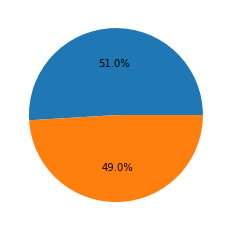

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist_pie, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
Descending_tp = Clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

    
Descending_tp
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merge_tv=pd.merge(Descending_tp, Clean_mouse_data, on = ["Mouse ID", "Timepoint"], how="left")
Merge_tv

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
Merge_tv.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
for drug in treatment:
    tumor_vol = Merge_tv.loc[Merge_tv["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    final_tumor_vol.append(tumor_vol)
 
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(outlier) 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print("--------------------------------------------------")
     

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The the median of occupancy is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------
The lower quartile of occupancy is: 31.56046955
The upper quartile of occupancy is: 40.65900627
The interquartile range of occupancy is: 9.098536719999998
The the median of occupancy is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------------------------
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.165180

{'whiskers': [<matplotlib.lines.Line2D at 0x24d8f7a5e88>,
 'caps': [<matplotlib.lines.Line2D at 0x24d8f87cd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d8f871f88>,
 'medians': [<matplotlib.lines.Line2D at 0x24d8f882c48>,
 'fliers': [<matplotlib.lines.Line2D at 0x24d8f882dc8>,
 'means': []}

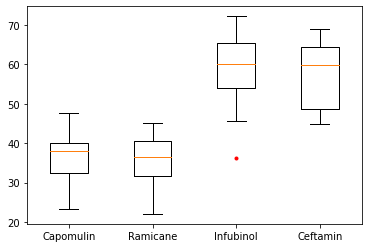

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(final_tumor_vol, labels = treatment, sym='r.' )

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for a mouse treated with Capomulin')

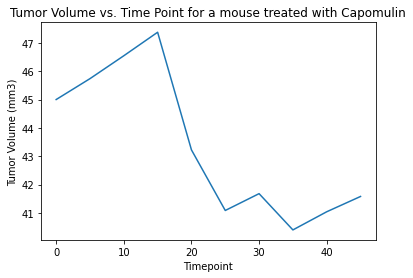

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#line plot for r944 
capomulin_data_r944 = Clean_mouse_data.loc[(Clean_mouse_data["Drug Regimen"] == "Capomulin") & (Clean_mouse_data["Mouse ID"] == "r944")]

x_axis = capomulin_data_r944["Timepoint"]
y_axis = capomulin_data_r944["Tumor Volume (mm3)"]

#Line plot
plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for a mouse treated with Capomulin")

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight for the Capomulin regimen')

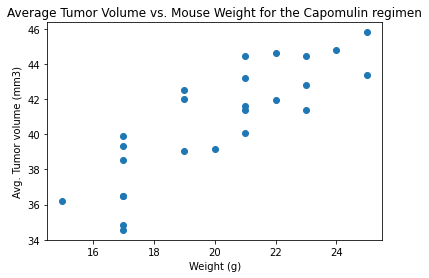

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = Clean_mouse_data.loc[Clean_mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_df.groupby("Mouse ID").mean()
x = capomulin_avg["Weight (g)"]
y = capomulin_avg["Tumor Volume (mm3)"]
#Scatter plot
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin regimen")

In [21]:

capomulin_df.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation coefficient
corr = round(st.pearsonr(x,y)[0],2)
corr

0.84

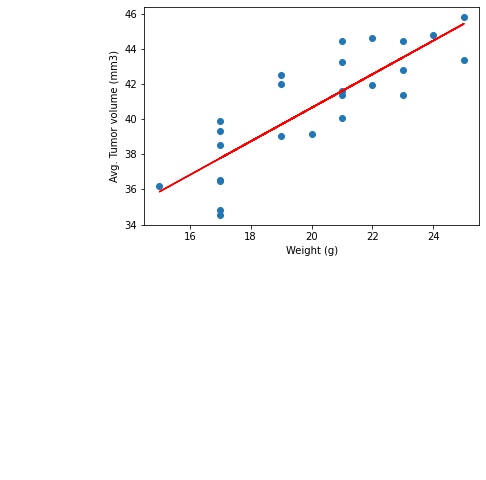

In [23]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor volume (mm3)")
plt.show()